## Homework 7 :  Physics 403, S25
Aidan Meador-Woodruff (ameadorw@ur.rochester.edu)

Due: Friday 11 April, 2025

In [1]:
# Glorious import statements
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import optimize as opt
from scipy.stats import chi2

### Problem 1 : The Bayesian Hubble Model
Hubble’s Law states that a galaxy located a distance $d$ from Earth will recede at a velocity $v$ given by
$$v = H_0 d.$$

Here, $H_0$ is called Hubble’s constant. By measuring the redshift of a galaxy, astronomers can calculate $v$ and therefore $d$ using $H_0$. However, $H_0$ is itself an experimentally determined quantity, so uncertainties in $H_0$ lead to systematic uncertainties in $d$. Given a measurement $v_m$ of $v$, $H_0$ is a nuisance parameter in the calculation of $d$. 

Suppose a galaxy has a measured recession velocity of $ v_m = (30 \pm 1) \times 10^3 \text{ km s}^{-1}. $ Assume a Gaussian uncertainty on $v_m$, i.e., the error bar $1 \times 10^3$ km s $^{-1}$ can be treated as the width of a Gaussian with mean $30 \times 10^3$ km s $^{-1}$. 

Using the measured velocity, calculate and plot the posterior PDF $p(d | v_m, I)$ of the distance to the galaxy for the cases listed below. In all cases, assume a flat prior $p(d | I)$ in the range $d \in [0, 800] \text{ Mpc}.$

---

*a).* We initially let $H_0$ be uniformly distributed between 50 and 90 km s $^{-1}$ Mpc $^{-1}$ (the unspeakable state of cosmology pre 1990s).

In [2]:
## We initially define all our given constants and ranges

vm = 30e3  # Recession velocity, km/s
sigma_vm = 1e3  # Errorbar on vm, km/s

d_min, d_max = 0, 800  # Distance to search in, Mpc
d_values = np.linspace(d_min, d_max, 1000) # Range of distance

H0_min, H0_max = 50, 90  # H0 range for the uniform case, km/s/Mpc
H0_values = np.linspace(H0_min, H0_max, 1000) # Range of H0

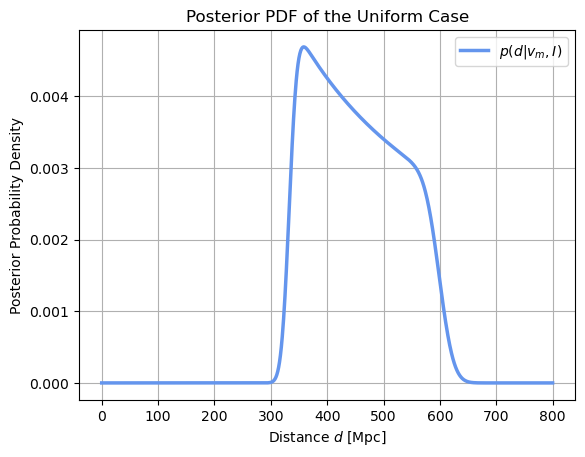

In [3]:
## Now the business of the uniform case

U_prior = 1 / (H0_max - H0_min)  # Uniform prior for H0
posterior = np.zeros_like(d_values) # Initialize the posterior

for i, d in enumerate(d_values):
    'Loop over all values and integrate to find the posteriors, assuming Gaussian likelihood.'
    likelihoods = norm.pdf(vm, loc=H0_values * d, scale=sigma_vm)
    posterior[i] = np.trapezoid(likelihoods * U_prior, H0_values)

# Normalize the posterior
posterior /= np.trapezoid(posterior, d_values)


plt.plot(d_values, posterior, label=r'$p(d|v_m, I)$', color='cornflowerblue',linewidth=2.5)
plt.xlabel('Distance $d$ [Mpc]')
plt.ylabel('Posterior Probability Density')
plt.title('Posterior PDF of the Uniform Case')
plt.legend()
plt.grid()

*b).* Now, we let $H_0$ be distributed in the same range, but using the Jeffreys prior. This prior is 

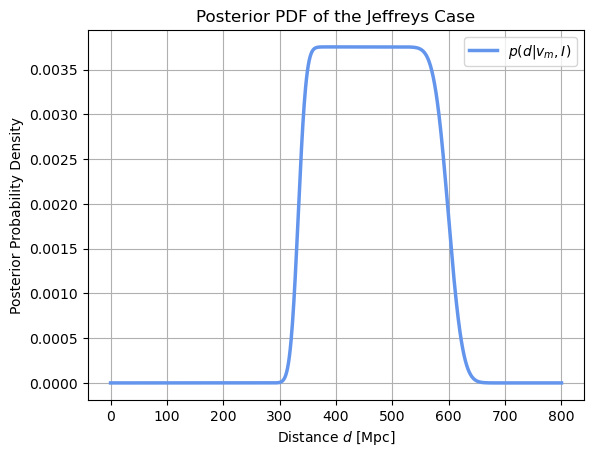

In [4]:
## The Jeffreys prior case

J_prior = 1/H0_values * np.trapezoid(H0_values,d_values) # Jeffreys prior
posterior = np.zeros_like(d_values) # Initialize the posterior

for i, d in enumerate(d_values):
    'Loop over all values and integrate to find the posteriors, assuming Gaussian likelihood.'
    likelihoods = norm.pdf(vm, loc=H0_values * d, scale=sigma_vm)
    posterior[i] = np.trapezoid(likelihoods * J_prior, H0_values)

# Normalize the posterior
posterior /= np.trapezoid(posterior, d_values)


plt.plot(d_values, posterior, label=r'$p(d|v_m, I)$', color='cornflowerblue',linewidth=2.5)
plt.xlabel('Distance $d$ [Mpc]')
plt.ylabel('Posterior Probability Density')
plt.title('Posterior PDF of the Jeffreys Case')
plt.legend()
plt.grid()

*c).* Now, again assuming Gaussian uncertainties in $H_0$, we plot the posterior PDF of $d$ on the same plot for the two cases that $H_0 = 74.03 \pm 1.42$ km s $^{-1}$ Mpc $^{-1}$ (Riess) and for  $H_0 = 67.66 \pm 0.42$ km s $^{-1}$ Mpc $^{-1}$ (Planck 2018). 

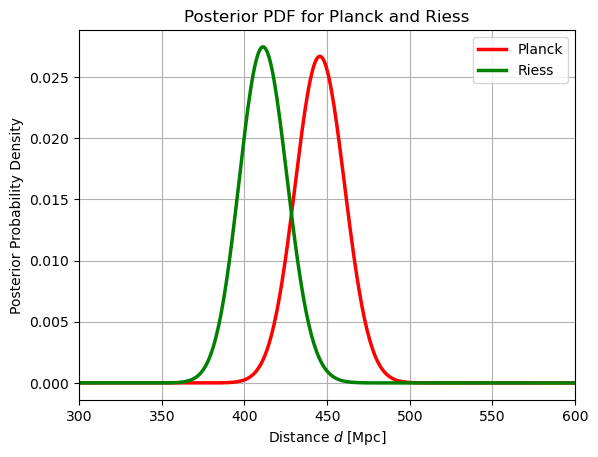

In [5]:
## Now for much more precise measurements of H0

Riess_H0 = np.linspace(68, 74.03, 80, 1000) 
Riess_prior = norm.pdf(Riess_H0, loc=74.03, scale=1.42)
Riess_prior /= np.trapezoid(Riess_prior, Riess_H0)  # Normalize
Riess_post = np.zeros_like(d_values)

Planck_H0 = np.linspace(62, 67.66, 70, 1000) 
Planck_prior = norm.pdf(Planck_H0, loc=67.66, scale=0.42)
Planck_prior /= np.trapezoid(Planck_prior,Planck_H0)
Planck_post = np.zeros_like(d_values)

for i, d in enumerate(d_values):
    'Loop over all values and integrate to find the posteriors, assuming Gaussian likelihood.'
    Riess_likelihoods = norm.pdf(vm, loc=Riess_H0 * d, scale=sigma_vm)
    Planck_likelihoods = norm.pdf(vm, loc=Planck_H0 * d, scale=sigma_vm)

    Planck_post[i] =  np.trapezoid(Planck_likelihoods * Planck_prior, Planck_H0)
    Riess_post[i] = np.trapezoid(Riess_likelihoods * Riess_prior, Riess_H0)

Planck_post /= np.trapezoid(Planck_post, d_values)
Riess_post /=np.trapezoid(Riess_post, d_values)

plt.plot(d_values, Planck_post, label=r'Planck', color='red',linewidth=2.5)
plt.plot(d_values, Riess_post, label=r'Riess', color='green',linewidth=2.5)
plt.xlabel('Distance $d$ [Mpc]')
plt.ylabel('Posterior Probability Density')
plt.title('Posterior PDF for Planck and Riess')
plt.xlim(300,600)
plt.legend()
plt.grid()


*d).* We wish to compute the two best estimates $\hat{d}$ and the central 68% confidence intervals of the PDFs from part c. The values of $H_0$ disagree in 4.5 $\sigma$, but we wish to treat $H_0$ as systematic in $d$, we wish to see if the values of $d$ agree or disagree within their central $68%$ credible intervals.

In [6]:
## Below we find the CI and the best estimates. I will use the CDF.
cdf_Riess = np.cumsum(Riess_post) / np.sum(Riess_post)
cdf_Planck = np.cumsum(Planck_post) / np.sum(Planck_post)
confidence = 0.68

lower_R = d_values[np.searchsorted(cdf_Riess, (1 - confidence) / 2)]
upper_R =  d_values[np.searchsorted(cdf_Riess, 1-(1 - confidence) / 2)]
d_R = d_values[np.argmax(Riess_post)] # Best estimator

lower_P =  d_values[np.searchsorted(cdf_Planck, (1 - confidence) / 2)]
upper_P =  d_values[np.searchsorted(cdf_Planck, 1-(1 - confidence) / 2)]
d_P = d_values[np.argmax(Planck_post)]

print(f"Best estimate for d (Riess): {d_R:.2f} Mpc, where the 68% CI: {lower_R:0.2f} to {upper_R:0.2f} Mpc.")
print(f"Best estimate for d (Planck 2018): {d_P:.2f} Mpc, where the 68% CI: {lower_P:0.2f} to {upper_P:0.2f} Mpc.")


Best estimate for d (Riess): 411.61 Mpc, where the 68% CI: 397.20 to 426.03 Mpc.
Best estimate for d (Planck 2018): 445.25 Mpc, where the 68% CI: 430.83 to 460.46 Mpc.


We see indeed that these values fall within each others 68% CI, hence the Hubble tension is not as impactful on these measurements of $d$ as the 4.5 $\sigma$ between the two values.

### Problem 2 : The $\Delta$ and Pull Methods

In the file linear data.txt a table of xy data are available. The data obey the relationship $$y= a + bx,$$
with Gaussian uncertainties $\sigma_i = 1$ for each data point. Suppose also that the data are affected by the distorting systematic $\Delta y = cx + dx^2$.  Assume that $c$ is expected to be 0 with an uncertainty of 0.05, and $d$ is expected to be 0 with uncertainty 0.01.

---

*a).* We wish to estimate the systematic uncertainties on $a$ and $b$ using the $\Delta$ method. To do so, we find the best-fit parameters $\hat{a}, \hat{b}$ assuming $c=d=0$ in a $\chi^2$ minmimization. Then, we let $c = \pm 0.05$ and fix $d=0$, and find $\Delta a = a-\hat{a}$ and $\Delta b = b - \hat{b}$. Then, we do the same for $d$ fixing $c=0$. Then we wish to table these values and plot the result. We begin by plotting our data.

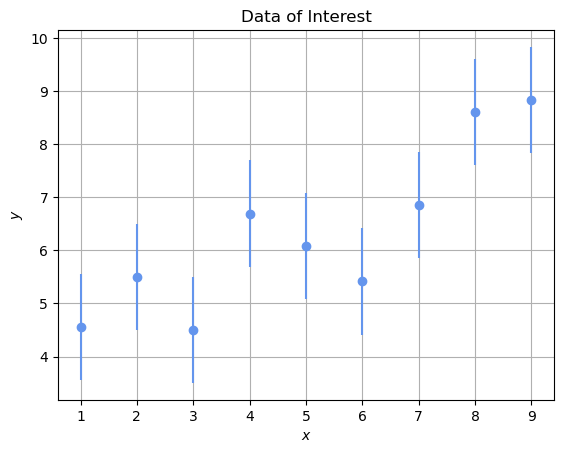

In [7]:
# Import the data and visualize it like a good physicist would.
data = np.loadtxt("linear_data.txt").transpose()
x,y, dy = data
plt.errorbar(x,y,yerr=dy, fmt='o',color='cornflowerblue',label='Dataset 1');
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid()
plt.title('Data of Interest');

Now we proceed with the $\Delta$ method. The linear $\chi^2$ with Gaussian errors is 
$$\chi^2_ = \sum_{i=1}^N \left(\frac{y_i - (a+bx_i)}{\sigma_i}\right)^2$$
We have already written code for the $\chi^2$ for the linear fit in HW 6, so I will use that code below

Best-fit parameters if c=d=0:
a_hat = 3.8501
b_hat = 0.4973


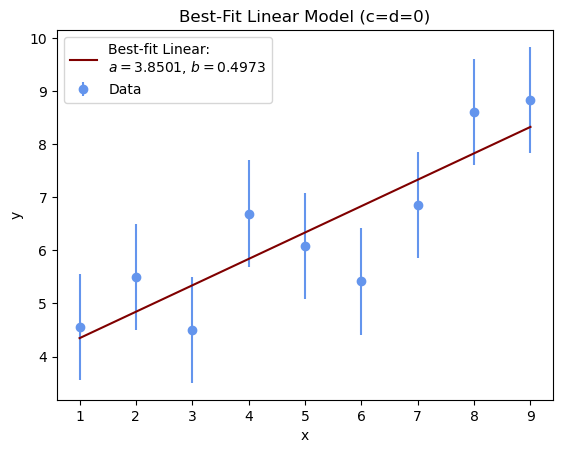

In [8]:
## Step 1, finding best fit parameters

# Weights for our variables
w = 1 / dy**2

# Weighted mean of x and y for computing best-fit parametrs.
x_bar = np.sum(w * x) / np.sum(w)
y_bar = np.sum(w * y) / np.sum(w)

# Best-fit of the parameter a and b.
b_hat = np.sum(w * (x - x_bar) * (y - y_bar)) / np.sum(w * (x - x_bar)**2)
a_hat = y_bar - b_hat * x_bar

# Uncertainties from linear fitting
sigma_a_stat = np.sqrt(1 / np.sum(w) + x_bar**2 / np.sum(w * (x - x_bar)**2))
sigma_b_stat = np.sqrt(1 / np.sum(w * (x - x_bar)**2))

### ------------ Plotting and such
print(f"Best-fit parameters if c=d=0:")
print(f"a_hat = {a_hat:.4f}")
print(f"b_hat = {b_hat:.4f}")
plt.errorbar(x, y, yerr=dy, fmt='o', label='Data', color='cornflowerblue')
plt.plot(x, a_hat + b_hat*x, label=f'Best-fit Linear: \n$a={a_hat:.4f}$, $b={b_hat:.4f}$', color='maroon')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best-Fit Linear Model (c=d=0)')
plt.legend();

Now, we will vary $c$ and fix $d=0.$

In [9]:
## Step 2 and Step 3, varying c and d

# Intitialize the delta array
delta_results = []

for c in [-0.05, 0.05]:
    # Looking at both c=+/- 0.05 fixing d=0.
    y_mod = y - c * x
    y_bar_c = np.sum(w * y_mod) / np.sum(w)
    b_c = np.sum(w * (x - x_bar) * (y_mod - y_bar_c)) / np.sum(w * (x - x_bar)**2)
    a_c = y_bar_c - b_c * x_bar
    delta_results.append((f"c={c:+.2f}, d=0", a_c - a_hat, b_c - b_hat))

for d in [-0.01, 0.01]:
    # Looking at both d=+/- 0.01 fixing c=0.
    y_mod = y - d * x**2
    y_bar_d = np.sum(w * y_mod) / np.sum(w)
    b_d = np.sum(w * (x - x_bar) * (y_mod - y_bar_d)) / np.sum(w * (x - x_bar)**2)
    a_d = y_bar_d - b_d * x_bar
    delta_results.append((f"c=0, d={d:+.2f}", a_d - a_hat, b_d - b_hat))

# Adding the errors in quadrature. Statistical error from above.
sigma_a_sys = np.sqrt(sum((d[1])**2 for d in delta_results))
sigma_b_sys = np.sqrt(sum((d[2])**2 for d in delta_results))
sigma_a_tot = np.sqrt(sigma_a_stat**2 + sigma_a_sys**2)
sigma_b_tot = np.sqrt(sigma_b_stat**2 + sigma_b_sys**2)

# Results table
print(f"a = {a_hat:.4f} ± {sigma_a_stat:.4f} (stat) ± {sigma_a_sys:.4f} (sys) = ± {sigma_a_tot:.4f} (tot)")
print(f"b = {b_hat:.4f} ± {sigma_b_stat:.4f} (stat) ± {sigma_b_sys:.4f} (sys) = ± {sigma_b_tot:.4f} (tot)\n")
print("{:<15} {:>10} {:>10}".format("Systematic", "Δa", "Δb"))
for label, da, db in delta_results:
    print(f"{label:<15} {da:+10.4f} {db:+10.4f}")

a = 3.8501 ± 0.7265 (stat) ± 0.2593 (sys) = ± 0.7714 (tot)
b = 0.4973 ± 0.1291 (stat) ± 0.1581 (sys) = ± 0.2041 (tot)

Systematic              Δa         Δb
c=-0.05, d=0       -0.0000    +0.0500
c=+0.05, d=0       -0.0000    -0.0500
c=0, d=-0.01       -0.1833    +0.1000
c=0, d=+0.01       +0.1833    -0.1000


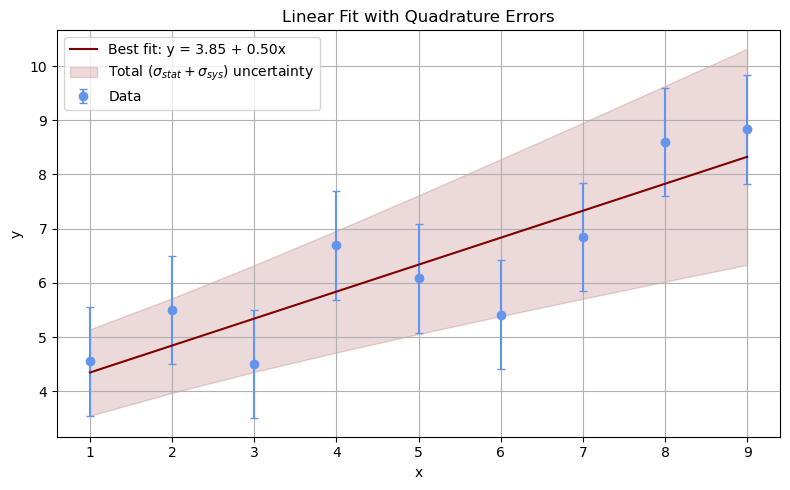

In [10]:
## Plotting these results with our quadrature errors (just 1 sigma).
y_fit =  a_hat + b_hat*x
y_conf_upper = y_fit + np.sqrt(sigma_a_tot**2 + (x**2) * sigma_b_tot**2)
y_conf_lower = y_fit - np.sqrt(sigma_a_tot**2 + (x**2) * sigma_b_tot**2)

plt.figure(figsize=(8, 5))
plt.errorbar(x, y, yerr=dy, fmt='o', label='Data', capsize=3,color='cornflowerblue')
plt.plot(x, y_fit, color='maroon', label=f'Best fit: y = {a_hat:.2f} + {b_hat:.2f}x')
plt.fill_between(x, y_conf_lower, y_conf_upper, color='maroon', alpha=0.15, label=r'Total ($\sigma_{stat} + \sigma_{sys}$) uncertainty')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit with Quadrature Errors')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


*b).* Now, we wish to estimate the systematic uncertainties on $a$ and $b$ using the pull method. In this approach, we view $c,d$ as nusiance parameters actually in the $\chi^2$ minimization as penalty terms with Gaussian uncertainties. Since they have a mean of $0$ and uncertainties of $0.05$ and $0.01$, the $\chi^2$ becomes

$$\chi^2 = \sum_{i=1}^N \left(\frac{y_i - (a+bx_i)-(cx_i + dx_i^2)}{\sigma_i}\right)^2 + \frac{c^2}{0.05^2} + \frac{d^2}{0.01^2}$$

We wish to minimize $\chi^2$ to find the new values for $a$ and $b$ and break out the uncertainties into systematic and statistical by finding the quadrature difference. We begin by defining a $\chi^2$ function with the pull terms

In [11]:
## Define chi^2 with pull terms
def chi2_pull(params):
    a,b,c,d = params
    model = a+ b *x + c*x + d* x**2
    main_chi2 = np.sum(((y-model)/dy)**2)
    pull_terms = (c/0.05)**2 + (d/0.01)**2
    full = main_chi2 + pull_terms
    return full

I will just use `scipy.optimize` to minimize the $\chi^2$, as we have done many such minimizations before. 

In [12]:
initial_guess = [a_hat, b_hat, 0, 0]
result = opt.minimize(chi2_pull, initial_guess)
a_pull, b_pull, c_pull, d_pull = result.x


jac = opt.approx_fprime(result.x, chi2_pull)
H = opt.approx_fprime(result.x, lambda p: opt.approx_fprime(p, chi2_pull))
cov_matrix =np.abs(np.linalg.inv(H))
#print(cov_matrix)
# Total uncertainties
sigma_a_tot = np.sqrt(cov_matrix[0, 0])
sigma_b_tot = np.sqrt(cov_matrix[1, 1])

# Systematic uncertainties (by subtraction in quadrature)
sigma_a_sys = np.sqrt(sigma_a_tot**2 - sigma_a_stat**2)
sigma_b_sys = np.sqrt(sigma_b_tot**2 - sigma_b_stat**2)

# Print results
print(f"a = {a_pull:.4f} ± {sigma_a_stat:.4f} (stat) ± {sigma_a_sys:.4f} (sys) → ± {sigma_a_tot:.4f} (tot)")
print(f"b = {b_pull:.4f} ± {sigma_b_stat:.4f} (stat) ± {sigma_b_sys:.4f} (sys) → ± {sigma_b_tot:.4f} (tot)")

a = 3.8827 ± 0.7265 (stat) ± 1.0960 (sys) → ± 1.3149 (tot)
b = 0.4795 ± 0.1291 (stat) ± 0.1520 (sys) → ± 0.1994 (tot)


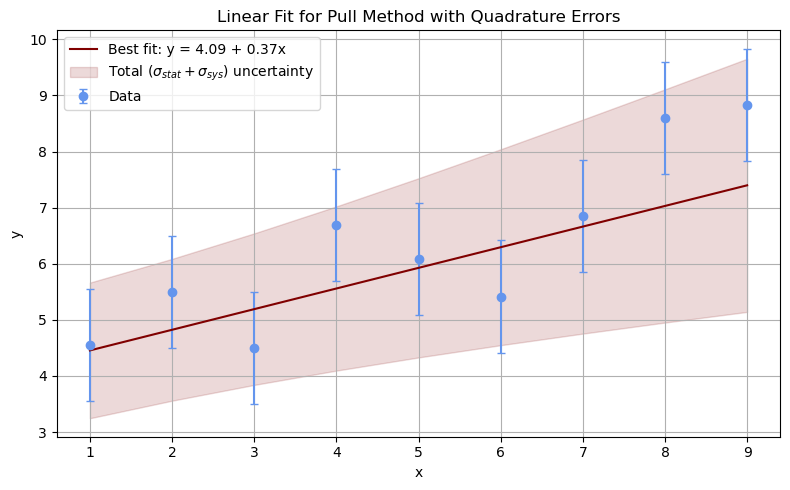

In [30]:
## Plotting these results with our quadrature errors (just 1 sigma).
y_fit = a_pull + x * b_pull
y_conf_upper = y_fit + np.sqrt(sigma_a_tot**2 + (x**2) * sigma_b_tot**2)
y_conf_lower = y_fit - np.sqrt(sigma_a_tot**2 + (x**2) * sigma_b_tot**2)

plt.figure(figsize=(8, 5))
plt.errorbar(x, y, yerr=dy, fmt='o', label='Data', capsize=3,color='cornflowerblue')
plt.plot(x, y_fit, color='maroon', label=f'Best fit: y = {a_pull:.2f} + {b_pull:.2f}x')
plt.fill_between(x, y_conf_lower, y_conf_upper, color='maroon', alpha=0.15, label=r'Total ($\sigma_{stat} + \sigma_{sys}$) uncertainty')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit for Pull Method with Quadrature Errors')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Our parameters for $a$ and $b$ are the same in both methods, but the uncertainties are larger in the pull method when subtracted by quadrature. 

*c).* Now, we wish to change $d\pm 0.03$ instead and compute the uncertainties for both $\Delta$ and pull methods. I have just repeated the code below for the $\Delta$ method first

In [20]:
## Redoing analysis for d in +/- 0.03

# Intitialize the delta array
delta_results = []

for c in [-0.05, 0.05]:
    # Looking at both c=+/- 0.05 fixing d=0.
    y_mod = y - c * x
    y_bar_c = np.sum(w * y_mod) / np.sum(w)
    b_c = np.sum(w * (x - x_bar) * (y_mod - y_bar_c)) / np.sum(w * (x - x_bar)**2)
    a_c = y_bar_c - b_c * x_bar
    delta_results.append((f"c={c:+.2f}, d=0", a_c - a_hat, b_c - b_hat))

for d in [-0.03, 0.03]:
    # Looking at both d=+/- 0.03 fixing c=0.
    y_mod = y - d * x**2
    y_bar_d = np.sum(w * y_mod) / np.sum(w)
    b_d = np.sum(w * (x - x_bar) * (y_mod - y_bar_d)) / np.sum(w * (x - x_bar)**2)
    a_d = y_bar_d - b_d * x_bar
    delta_results.append((f"c=0, d={d:+.2f}", a_d - a_hat, b_d - b_hat))

# Adding the errors in quadrature. Statistical error from above.
sigma_a_sys = np.sqrt(sum((d[1])**2 for d in delta_results))
sigma_b_sys = np.sqrt(sum((d[2])**2 for d in delta_results))
sigma_a_tot = np.sqrt(sigma_a_stat**2 + sigma_a_sys**2)
sigma_b_tot = np.sqrt(sigma_b_stat**2 + sigma_b_sys**2)

# Results table
print(f"a = {a_hat:.4f} ± {sigma_a_stat:.4f} (stat) ± {sigma_a_sys:.4f} (sys) = ± {sigma_a_tot:.4f} (tot)")
print(f"b = {b_hat:.4f} ± {sigma_b_stat:.4f} (stat) ± {sigma_b_sys:.4f} (sys) = ± {sigma_b_tot:.4f} (tot)\n")
print("{:<15} {:>10} {:>10}".format("Systematic", "Δa", "Δb"))
for label, da, db in delta_results:
    print(f"{label:<15} {da:+10.4f} {db:+10.4f}")

a = 3.8501 ± 0.7265 (stat) ± 0.7778 (sys) = ± 1.0643 (tot)
b = 0.4973 ± 0.1291 (stat) ± 0.4301 (sys) = ± 0.4491 (tot)

Systematic              Δa         Δb
c=-0.05, d=0       -0.0000    +0.0500
c=+0.05, d=0       -0.0000    -0.0500
c=0, d=-0.03       -0.5500    +0.3000
c=0, d=+0.03       +0.5500    -0.3000


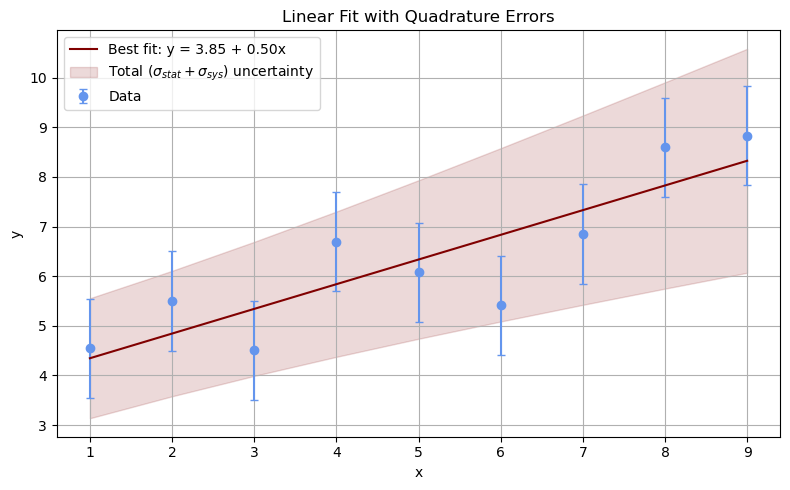

In [23]:
## Plotting these results with our quadrature errors (just 1 sigma).
y_fit =  a_hat + b_hat*x
y_conf_upper = y_fit + np.sqrt(sigma_a_tot**2 + (x**2) * sigma_b_tot**2)
y_conf_lower = y_fit - np.sqrt(sigma_a_tot**2 + (x**2) * sigma_b_tot**2)

plt.figure(figsize=(8, 5))
plt.errorbar(x, y, yerr=dy, fmt='o', label='Data', capsize=3,color='cornflowerblue')
plt.plot(x, y_fit, color='maroon', label=f'Best fit: y = {a_hat:.2f} + {b_hat:.2f}x')
plt.fill_between(x, y_conf_lower, y_conf_upper, color='maroon', alpha=0.15, label=r'Total ($\sigma_{stat} + \sigma_{sys}$) uncertainty')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit with Quadrature Errors')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The total uncertainty is much larger than it was previously in both parameters (roughly double) due to an increase in the statistical uncertainty. This makes sense, as the systematics stay the same. Now, for the $\Delta$ model, we do the same

In [27]:
## Define chi^2 with pull terms
def chi2_pull(params):
    'Now, I have changed this to d->0.03 in the nuisance term.'
    a,b,c,d = params
    model = a+ b *x + c*x + d* x**2
    main_chi2 = np.sum(((y-model)/dy)**2)
    pull_terms = (c/0.05)**2 + (d/0.03)**2
    full = main_chi2 + pull_terms
    return full

initial_guess = [a_hat, b_hat, 0, 0]
result = opt.minimize(chi2_pull, initial_guess)
a_pull, b_pull, c_pull, d_pull = result.x


jac = opt.approx_fprime(result.x, chi2_pull)
H = opt.approx_fprime(result.x, lambda p: opt.approx_fprime(p, chi2_pull))
cov_matrix =np.abs(np.linalg.inv(H))
#print(cov_matrix)
# Total uncertainties
sigma_a_tot = np.sqrt(cov_matrix[0, 0])
sigma_b_tot = np.sqrt(cov_matrix[1, 1])

# Systematic uncertainties (by subtraction in quadrature)
sigma_a_sys = np.sqrt(sigma_a_tot**2 - sigma_a_stat**2)
sigma_b_sys = np.sqrt(sigma_b_tot**2 - sigma_b_stat**2)

# Print results
print(f"a = {a_pull:.4f} ± {sigma_a_stat:.4f} (stat) ± {sigma_a_sys:.4f} (sys) → ± {sigma_a_tot:.4f} (tot)")
print(f"b = {b_pull:.4f} ± {sigma_b_stat:.4f} (stat) ± {sigma_b_sys:.4f} (sys) → ± {sigma_b_tot:.4f} (tot)")

a = 4.0872 ± 0.7265 (stat) ± 0.9427 (sys) → ± 1.1902 (tot)
b = 0.3679 ± 0.1291 (stat) ± 0.1695 (sys) → ± 0.2130 (tot)


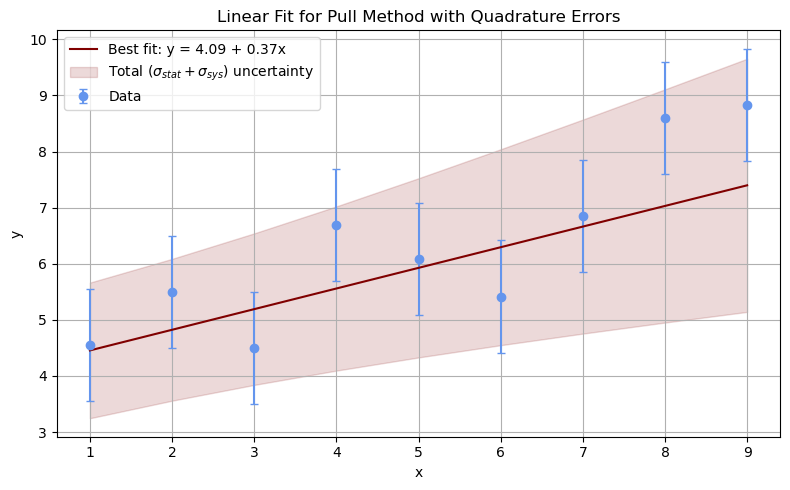

In [32]:
## Plotting these results with our quadrature errors (just 1 sigma).
y_fit = a_pull + x * b_pull
y_conf_upper = y_fit + np.sqrt(sigma_a_tot**2 + (x**2) * sigma_b_tot**2)
y_conf_lower = y_fit - np.sqrt(sigma_a_tot**2 + (x**2) * sigma_b_tot**2)

plt.figure(figsize=(8, 5))
plt.errorbar(x, y, yerr=dy, fmt='o', label='Data', capsize=3,color='cornflowerblue')
plt.plot(x, y_fit, color='maroon', label=f'Best fit: y = {a_pull:.2f} + {b_pull:.2f}x')
plt.fill_between(x, y_conf_lower, y_conf_upper, color='maroon', alpha=0.15, label=r'Total ($\sigma_{stat} + \sigma_{sys}$) uncertainty')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit for Pull Method with Quadrature Errors')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This is not that much different from before. The fit for $a$ is a little better, but the fit for $b$ is a little worse. The uncertainties do not move that much, though. This result makes sense. The $\Delta$ method assumes that the uncertainties are the worst they can be, and reflects the maxium effect of the nuisance parameters in $\Delta y$. Since the pull method actually incorporates these parameters into the $\chi^2$, it allows both parameters to shift. This means that the $\Delta$ method is more conservative in its error reporting and the pull method is more "data-driven."